<a href="https://colab.research.google.com/github/Rickmwasofficial/DeepLearningPython/blob/master/Medical_Cost_Regression_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
# Import Nescessary packages
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [83]:
insurance = pd.read_csv('/content/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [84]:
# One hot encode a pandas dataframe
insurance_one_hot = pd.get_dummies(insurance)

In [85]:
# Create X and y values
X = insurance_one_hot.drop('charges', axis=1)
y = insurance.charges
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [86]:
X.children

0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: int64

In [87]:
# Split into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

In [76]:
X_train, X_test, y_train, y_test = tf.constant(X_train.astype(np.float64)), tf.constant(X_test.astype(np.float64)), tf.constant(y_train.astype(np.float64)), tf.constant(y_test.astype(np.float64))

In [77]:
tf.random.set_seed(42)

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['mae']
)

history = model.fit(X_train, y_train, epochs=300)

Epoch 1/300
34/34 [==============================] - 1s 3ms/step - loss: 11325.6445 - mae: 11325.6445
Epoch 2/300
34/34 [==============================] - 0s 3ms/step - loss: 7490.7168 - mae: 7490.7168
Epoch 3/300
34/34 [==============================] - 0s 2ms/step - loss: 7263.4487 - mae: 7263.4487
Epoch 4/300
34/34 [==============================] - 0s 2ms/step - loss: 7012.1191 - mae: 7012.1191
Epoch 5/300
34/34 [==============================] - 0s 2ms/step - loss: 6727.2217 - mae: 6727.2217
Epoch 6/300
34/34 [==============================] - 0s 2ms/step - loss: 6452.4712 - mae: 6452.4712
Epoch 7/300
34/34 [==============================] - 0s 2ms/step - loss: 6328.8652 - mae: 6328.8652
Epoch 8/300
34/34 [==============================] - 0s 2ms/step - loss: 6191.7158 - mae: 6191.7158
Epoch 9/300
34/34 [==============================] - 0s 2ms/step - loss: 6003.2979 - mae: 6003.2979
Epoch 10/300
34/34 [==============================] - 0s 2ms/step - loss: 5802.9263 - mae: 5802.92

In [78]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3179.6687 - mae: 3179.6687


[3179.668701171875, 3179.668701171875]

Text(0.5, 0, 'Epochs')

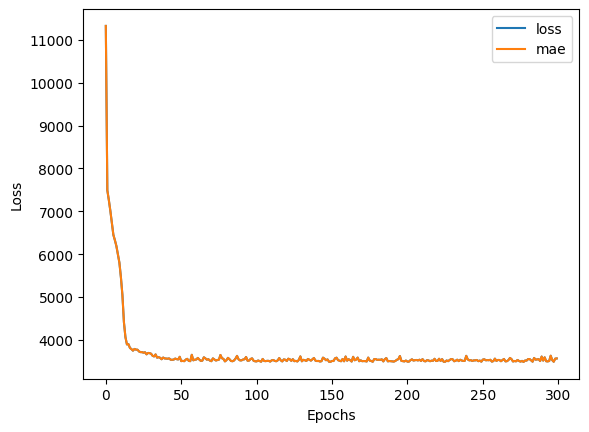

In [79]:
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [80]:
# Preprocessing data Normalization and standardization
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,False,True,True,False,False,True,False,False
1334,18,31.920,0,True,False,True,False,True,False,False,False
1335,18,36.850,0,True,False,True,False,False,False,True,False
1336,21,25.800,0,True,False,True,False,False,False,False,True


In terms of scaling values, neural networks prefers normalized values

In [89]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'children', 'bmi']),
    (OneHotEncoder(handle_unknown='ignore'), ['smoker', 'region'])
)

# fit the column transfromer to our training data
ct.fit(X_train)

# Tranform test and training data with normalization and onehotencoder
X_train_normal = ct.tranform(X_train)
X_test_normal = ct.transform(X_test)

ValueError: A given column is not a column of the dataframe